In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import utils.measure as ms
import utils.network as networks 
import utils.nodes as nd
import utils.visualization as vs 

import os

from matplotlib.colors import TwoSlopeNorm

from matplotlib.colors import CenteredNorm

import glob


In [3]:
# input_path = '../Run_2_results/Run_2_n_1_o_0p9'

In [4]:
def plot_slice_families(folder, fixed="number", run_number=3, fixed_value = 1, manip_day = 1000, feedback_day = np.nan, time_mode = "years"):
    
    
    if fixed == "number":
        # Define the pattern for matching files
        pattern = folder + f"/Run_{run_number}_n_{fixed_value}_*.csv"
        # Get a list of all file paths matching the pattern
        file_paths = glob.glob(pattern)
        print(pattern)
        dataframes = [] 
        for file_path in file_paths:
            if os.path.isfile(file_path):
                    # Read the file into a DataFrame
                    df = pd.read_csv(file_path, sep=",", header=0)  # header=0 assumes first line as column names
                    dataframes.append(df)  # Add DataFrame to the list
            else:
                print(f"No opinion_trend.txt found in: {file_path}")
    
    if not dataframes:
        print("No DataFrames found to combine.")
    else:
         print(len(dataframes))

    if time_mode == "year" or time_mode == "years":
        for df in dataframes:
            plt.plot(df["day"]/365, df["1"], color= "red", alpha = 0.75)
            plt.plot(df["day"]/365, df["0"], color = "gray", alpha = 0.75)
            plt.plot(df["day"]/365, df["-1"], color = "blue", alpha = 0.75) 
    elif time_mode == "day" or time_mode == "days": 
        for df in dataframes:
            plt.plot(df["day"], df["1"], color= "red", alpha = 0.75)
            plt.plot(df["day"], df["0"], color = "gray", alpha = 0.75)
            plt.plot(df["day"], df["-1"], color = "blue", alpha = 0.75) 
    
    # plt.plot([], [], color="red", label="red share")    # Dummy plot for red share
    # plt.plot([], [], color="gray", label="neutral share")  # Dummy plot for neutral share
    # plt.plot([], [], color="blue", label="blue share")  # Dummy plot for blue share
    # plt.legend(loc='best')
    if time_mode == "year" or time_mode == "years":
        plt.axvline(x=manip_day/365, color = "black", linestyle = "--") #, label = "media shift")
        if not np.isnan(feedback_day):
            plt.axvline(x=feedback_day/365, color = "black", linestyle = ":") #, label = "media feedback")
    elif time_mode == "day" or time_mode == "days": 
        plt.axvline(x=manip_day/365, color = "black", linestyle = "--") #, label = "media shift")
        if not np.isnan(feedback_day):
            plt.axvline(x=feedback_day/365, color = "black", linestyle = ":") #, label = "media feedback")
      
    plt.plot([], [], label = "Opinion 1", color= "red", alpha = 0.75)
    plt.plot([], [], label = "Opinion 0", color= "gray", alpha = 0.75)
    plt.plot([], [], label = "Opinion -1", color= "blue", alpha = 0.75)


    plt.legend(loc = 'best')
    plt.ylabel("voter share")
    plt.xlabel(f"t ({time_mode})")
    plt.grid()
    plt.minorticks_on()
    plt.grid(which='major', color='black', linestyle='-', linewidth=0.5, alpha=0.4)
    plt.grid(which='minor', color='black', linestyle='--', linewidth=0.3,alpha=0.4)
    plt.show()
        
        

Results_experiment_3/Run_3_n_1_*.csv
10


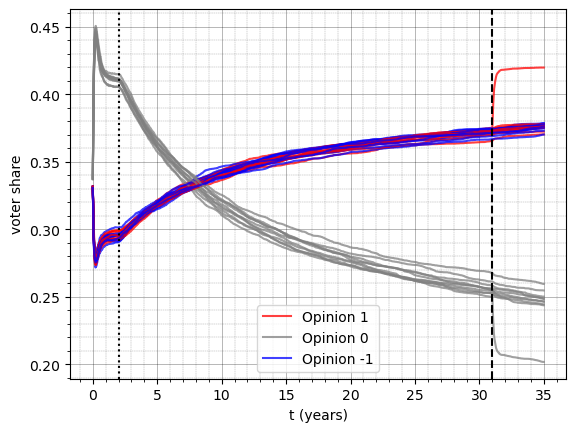

In [5]:
plot_slice_families("Results_experiment_3", run_number=3, manip_day=31*365, feedback_day=730, time_mode = "years")


In [6]:
def result_analysis(input_path, result_folder_name, folder_name, index_factor=5):
   
    # Define the path to the main folder containing subfolders
    main_folder_path = input_path

    # List to store DataFrames
    dataframes = []

    # Loop through all subfolders
    try:
        for subfolder_name in os.listdir(main_folder_path):
            subfolder_path = os.path.join(main_folder_path, subfolder_name)

            # Check if it's a directory
            if os.path.isdir(subfolder_path):
                file_path = os.path.join(subfolder_path, 'opinion_trend.txt')

                # Check if the file exists in the current subfolder
                if os.path.isfile(file_path):
                    # Read the file into a DataFrame
                    df = pd.read_csv(file_path, sep="\t", header=0)  # header=0 assumes first line as column names
                    dataframes.append(df)  # Add DataFrame to the list
                    print(f"Loaded data from: {file_path}")
                else:
                    print(f"No opinion_trend.txt found in: {subfolder_path}")
    except Exception as e:
        print(f"An error occurred: {e}")

    # Now `dataframes` contains a DataFrame for each folder's opinion_trend.txt
    print(f"Loaded {len(dataframes)} DataFrames.")

    # Ensure the list `dataframes` contains all the loaded DataFrames from the previous code
    if not dataframes:
        print("No DataFrames found to combine.")
    else:
        # Check that all DataFrames have the same shape
        if not all(df.shape == dataframes[0].shape for df in dataframes):
            print("Error: Not all DataFrames have the same shape.")
        else:
            # Compute the element-wise average
            # Use `.values` to extract NumPy arrays and then average them
            average_values = sum(df.values for df in dataframes) / len(dataframes)
            
            # Create a new DataFrame with the averaged values
            average_df = pd.DataFrame(average_values, columns=dataframes[0].columns)
            
            print("Average DataFrame:")
            print(average_df)

    average_df.index = average_df.index * index_factor

    results_folder = result_folder_name
    if not os.path.exists(results_folder):
        os.makedirs(results_folder)
        print(f"Folder '{results_folder}' created.")

    average_df.to_csv(result_folder_name+"/"+folder_name+".csv",index_label = "day")

    plt.plot(average_df.index, average_df["1"], color= "red")
    plt.plot(average_df.index, average_df["0"], color = "gray")
    plt.plot(average_df.index, average_df["-1"], color = "blue") 
    # plt.rc('text', usetex=False)
    # plt.rc('font', family='sans-serif')  # Use a serif font for LaTeX style
    # # plt.rc('text.latex', preamble=r'\usepackage{sfmath}')  # Use sans-serif math mode
    # plt.rcParams.update({
    #     'font.size': 18,  # General font size
    #     'axes.titlesize': 20,  # Title font size
    #     'axes.labelsize': 20,  # Label font size
    #     'legend.fontsize': 16,  # Legend font size
    #     'xtick.labelsize': 16,  # x-axis tick font size
    # })
    plt.savefig(result_folder_name+"/"+folder_name+".pdf")
    # plt.show()


def complete_analysis(path, result_folder_name,index_factor=5):
    try:
        for subfolder_name in os.listdir(path):
            subfolder_path = os.path.join(path, subfolder_name)

            result_analysis(subfolder_path, result_folder_name, index_factor=index_factor, folder_name=subfolder_name)
           
    except Exception as e:
        print(f"An error occurred: {e}")


def meta_analysis(folder, media, opinion, run_number=2, factor = 5, feedback_day = 1000, test_duration = 1):
    result_list = []
    for m in media:
        op_list = []
        for o in opinion:
            df = pd.read_csv(folder+f"\Run_{run_number}_n_{m}_o_{o}".replace(".","p")+".csv")
            df.index = df.index * factor
            df["diff"] =  df["1"] - df["-1"]
            df["days"] = df.index
            res = np.mean(df.loc[ (df["days"] > feedback_day) &  (df["days"] < feedback_day+365*test_duration), "diff"])
            op_list.append(res)
        result_list.append(op_list)

    return result_list    

    
    

Loaded data from: ..\experiment_1_2_final\Run_3_n_1_o_-0p0\figures_20241201\opinion_trend.txt
Loaded data from: ..\experiment_1_2_final\Run_3_n_1_o_-0p0\figures_20241201_1\opinion_trend.txt
Loaded data from: ..\experiment_1_2_final\Run_3_n_1_o_-0p0\figures_20241201_10\opinion_trend.txt
Loaded data from: ..\experiment_1_2_final\Run_3_n_1_o_-0p0\figures_20241201_11\opinion_trend.txt
Loaded data from: ..\experiment_1_2_final\Run_3_n_1_o_-0p0\figures_20241201_12\opinion_trend.txt
Loaded data from: ..\experiment_1_2_final\Run_3_n_1_o_-0p0\figures_20241201_13\opinion_trend.txt
Loaded data from: ..\experiment_1_2_final\Run_3_n_1_o_-0p0\figures_20241201_14\opinion_trend.txt
Loaded data from: ..\experiment_1_2_final\Run_3_n_1_o_-0p0\figures_20241201_15\opinion_trend.txt
Loaded data from: ..\experiment_1_2_final\Run_3_n_1_o_-0p0\figures_20241201_16\opinion_trend.txt
Loaded data from: ..\experiment_1_2_final\Run_3_n_1_o_-0p0\figures_20241201_17\opinion_trend.txt
Loaded data from: ..\experiment_1_

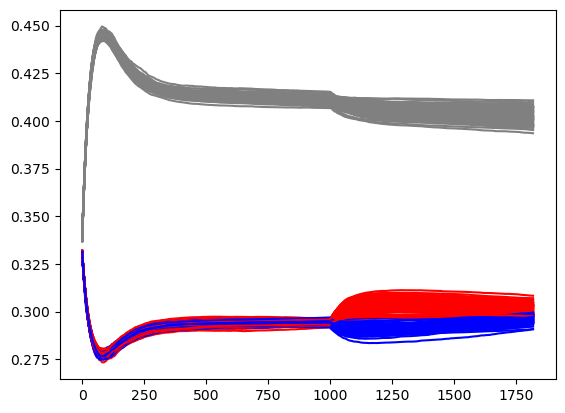

In [7]:
complete_analysis("..\experiment_1_2_final", "Results_experiment_2_1")

In [299]:
opinion_list = target_opinion = np.linspace(-1, 0.9, num=20)
opinion_list = [round(o,3) for o in opinion_list]
opinion_list

[-1.0,
 -0.9,
 -0.8,
 -0.7,
 -0.6,
 -0.5,
 -0.4,
 -0.3,
 -0.2,
 -0.1,
 -0.0,
 0.1,
 0.2,
 0.3,
 0.4,
 0.5,
 0.6,
 0.7,
 0.8,
 0.9]

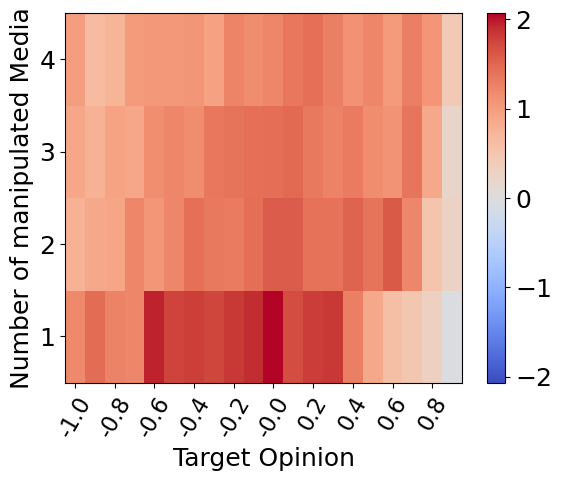

In [304]:
media_list = np.array([1,2,3,4])#np.arange(1,25,3)
opinion_list = target_opinion = np.linspace(-1, 0.9, num=20)
opinion_list = [round(o,3) for o in opinion_list]


heatmap = np.array(meta_analysis("Results_experiment_2_1",media_list, opinion_list, run_number=3, feedback_day=1000, test_duration=1))*100

# heatmap = heatmap[:5]

# Dynamically normalize colormap
vmin, vmax = -heatmap.max(), heatmap.max()
norm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

# Create the heatmap
plt.imshow(heatmap, aspect='auto', origin='lower', cmap='coolwarm', norm=norm)

# Add a colorbar
plt.colorbar()

# Set tick positions and labels for x-axis (opinion_list) 
plt.xticks(np.arange(0, len(opinion_list), 2),  opinion_list[::2], rotation=60)

# Set tick positions and labels for y-axis (media_list)
plt.yticks(np.arange(len(media_list)), media_list)

# Set axis labels (optional)
plt.xlabel('Target Opinion')
plt.ylabel('Number of manipulated Media')


# Show the plot
plt.show()

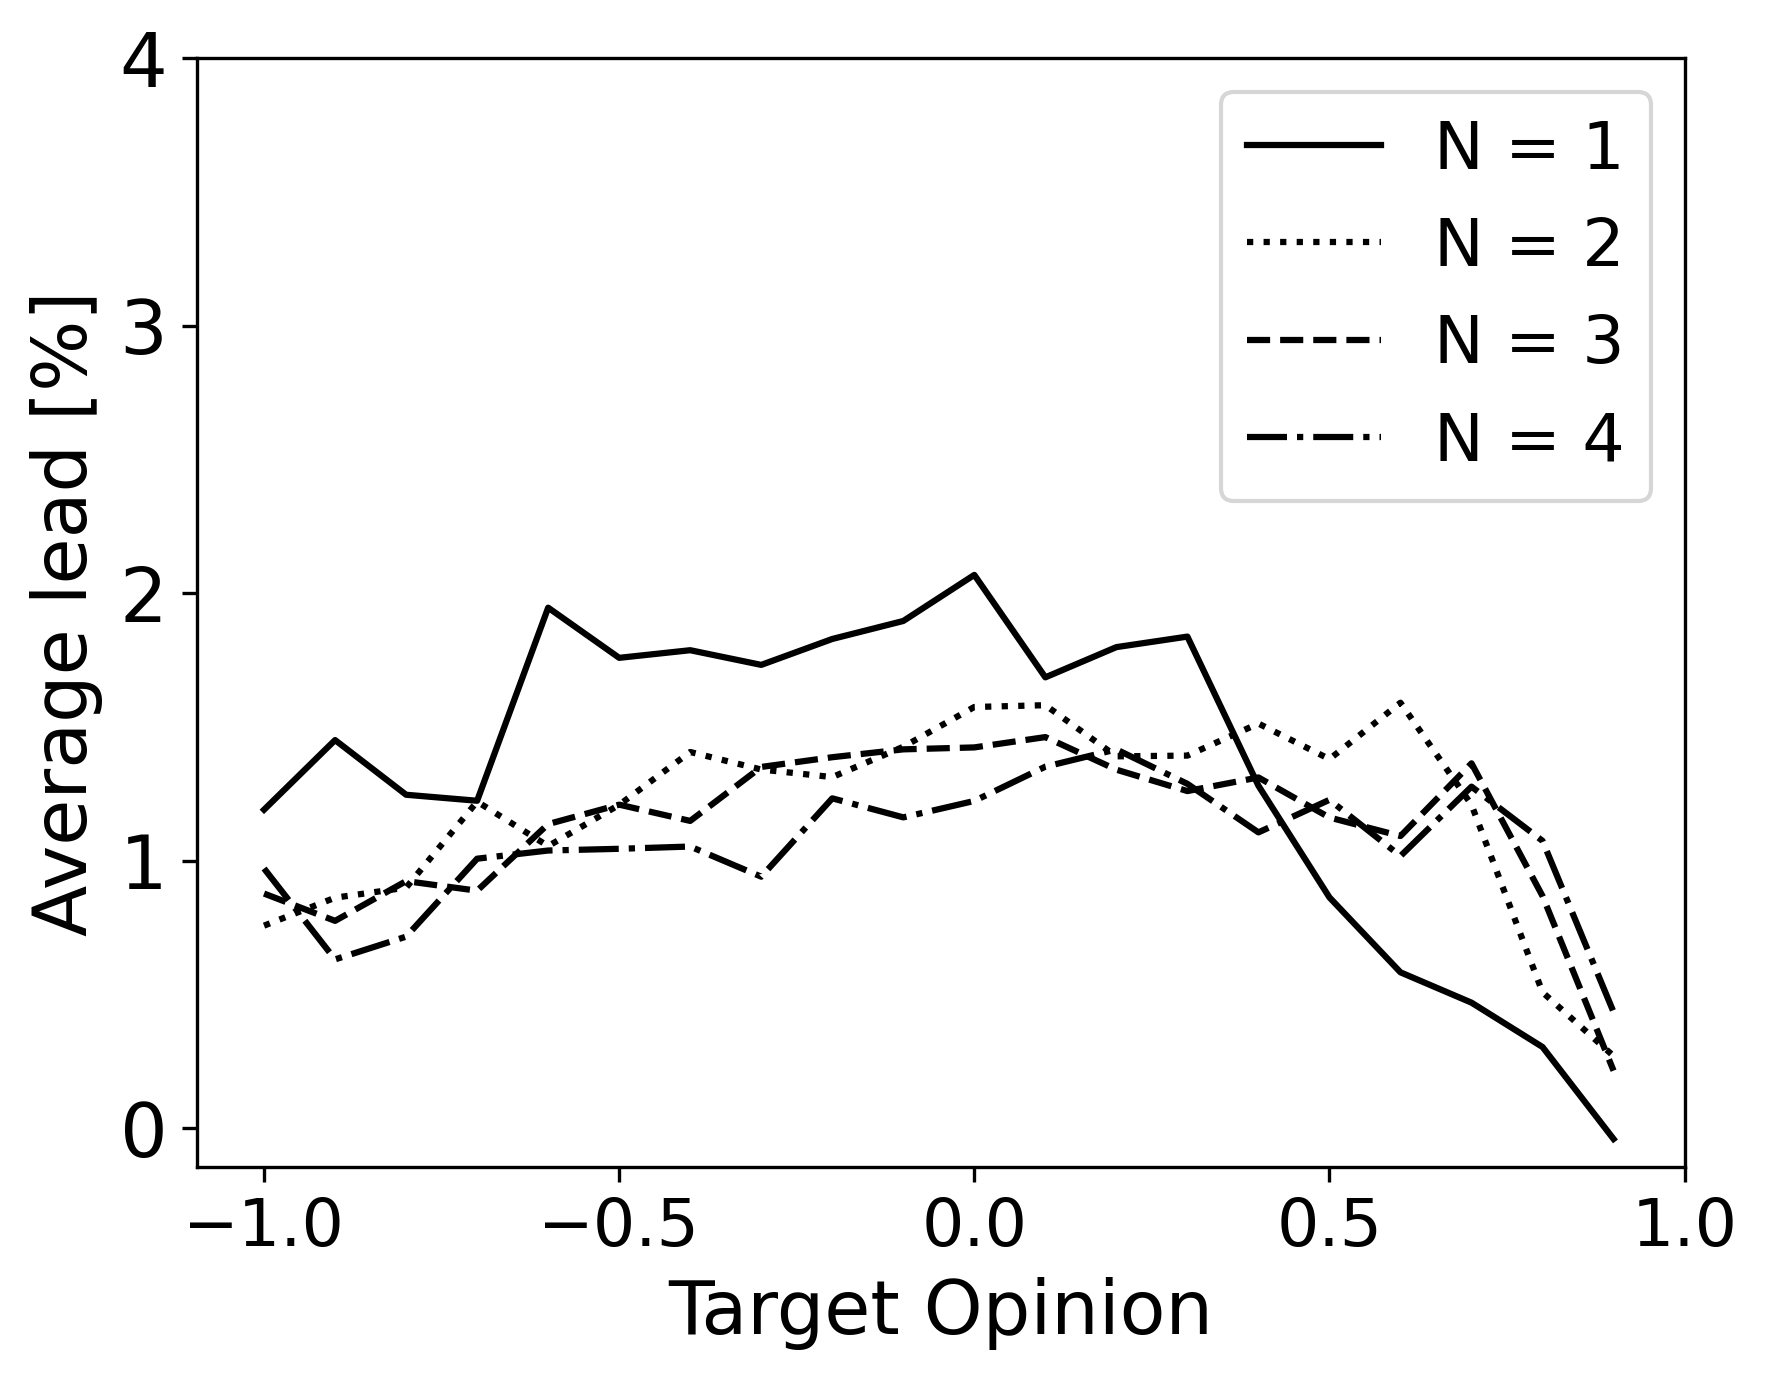

In [305]:
plt.figure(dpi=300)
plt.plot(opinion_list, heatmap[0], color = "black", label = "N = 1")
plt.plot(opinion_list, heatmap[1], color = "black", linestyle = ":", label = "N = 2")
plt.plot(opinion_list, heatmap[2], color = "black", linestyle = "--", label = "N = 3")
plt.plot(opinion_list, heatmap[3], color = "black", linestyle = "-.", label = "N = 4")
plt.ylim(top=4)
plt.xlim(right=1)
plt.ylabel("Average lead [%]")
plt.xlabel("Target Opinion")
plt.legend(loc='best')

Loaded data from: ..\Run_2_1_results\Run_2_n_2_o_-0p136\figures_20241130\opinion_trend.txt
Loaded data from: ..\Run_2_1_results\Run_2_n_2_o_-0p136\figures_20241130_1\opinion_trend.txt
Loaded data from: ..\Run_2_1_results\Run_2_n_2_o_-0p136\figures_20241130_2\opinion_trend.txt
Loaded data from: ..\Run_2_1_results\Run_2_n_2_o_-0p136\figures_20241130_3\opinion_trend.txt
Loaded data from: ..\Run_2_1_results\Run_2_n_2_o_-0p136\figures_20241130_4\opinion_trend.txt
Loaded data from: ..\Run_2_1_results\Run_2_n_2_o_-0p136\figures_20241130_5\opinion_trend.txt
Loaded data from: ..\Run_2_1_results\Run_2_n_2_o_-0p136\figures_20241130_6\opinion_trend.txt
Loaded data from: ..\Run_2_1_results\Run_2_n_2_o_-0p136\figures_20241130_7\opinion_trend.txt
Loaded 8 DataFrames.
Average DataFrame:
          -1        0        1
0    0.33130  0.33690  0.33180
1    0.32300  0.35590  0.32110
2    0.31530  0.37010  0.31460
3    0.30830  0.38430  0.30740
4    0.30250  0.39630  0.30120
..       ...      ...      ...
3

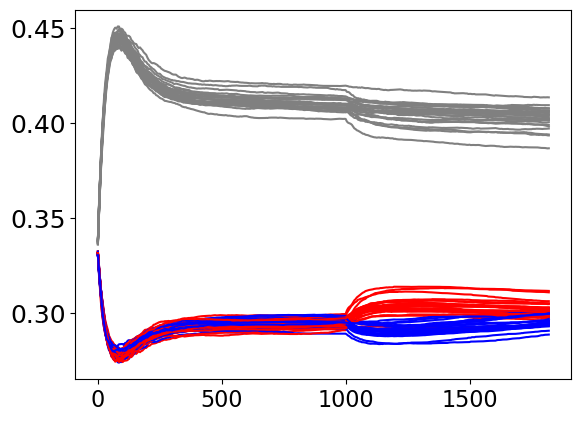

In [264]:
complete_analysis("..\Run_2_1_results", "Results_v2")

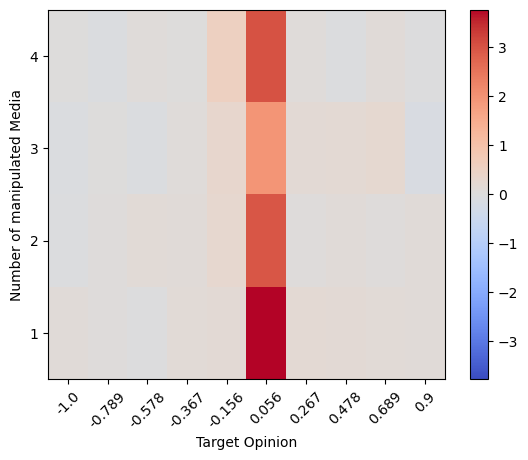

In [8]:
media_list = np.array([1,2,3,4])#np.arange(1,25,3)
opinion_list = np.linspace(-1, 0.9, num=10)
opinion_list = [round(o,3) for o in opinion_list]


heatmap = np.array(meta_analysis("Results_experiment_3",media_list, opinion_list, run_number=3, feedback_day=31*365, test_duration=1))*100

# heatmap = heatmap[:5]

# Dynamically normalize colormap
vmin, vmax = -heatmap.max(), heatmap.max()
norm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

# Create the heatmap
plt.imshow(heatmap, aspect='auto', origin='lower', cmap='coolwarm', norm=norm)

# Add a colorbar
plt.colorbar()

# Set tick positions and labels for x-axis (opinion_list)
plt.xticks(np.arange(len(opinion_list)), opinion_list, rotation=45)

# Set tick positions and labels for y-axis (media_list)
plt.yticks(np.arange(len(media_list)), media_list)

# Set axis labels (optional)
plt.xlabel('Target Opinion')
plt.ylabel('Number of manipulated Media')


# Show the plot
plt.show()

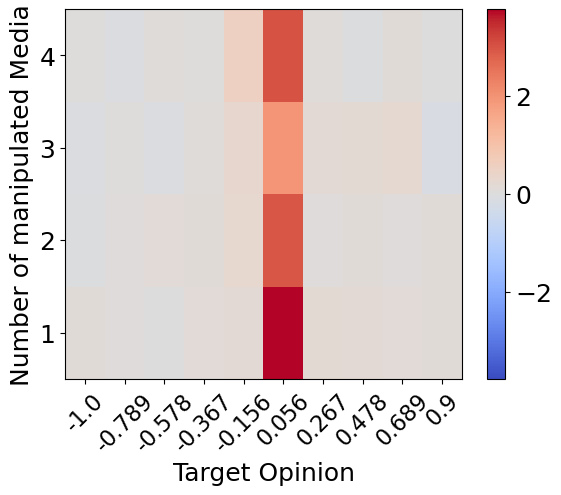

In [284]:
media_list = np.array([1,2,3,4])#np.arange(1,25,3)
opinion_list = np.linspace(-1, 0.9, num=10)
opinion_list = [round(o,3) for o in opinion_list]


heatmap = np.array(meta_analysis("Results_experiment_3",media_list, opinion_list, run_number=3, feedback_day=31*365, test_duration=1))*100

# heatmap = heatmap[:5]

# Dynamically normalize colormap
vmin, vmax = -heatmap.max(), heatmap.max()
norm = CenteredNorm(vcenter=0)

# Create the heatmap
plt.imshow(heatmap, aspect='auto', origin='lower', cmap='coolwarm', norm=norm)

# Add a colorbar
plt.colorbar()

# Set tick positions and labels for x-axis (opinion_list)
plt.xticks(np.arange(len(opinion_list)), opinion_list, rotation=45)

# Set tick positions and labels for y-axis (media_list)
plt.yticks(np.arange(len(media_list)), media_list)

# Set axis labels (optional)
plt.xlabel('Target Opinion')
plt.ylabel('Number of manipulated Media')


# Show the plot
plt.show()

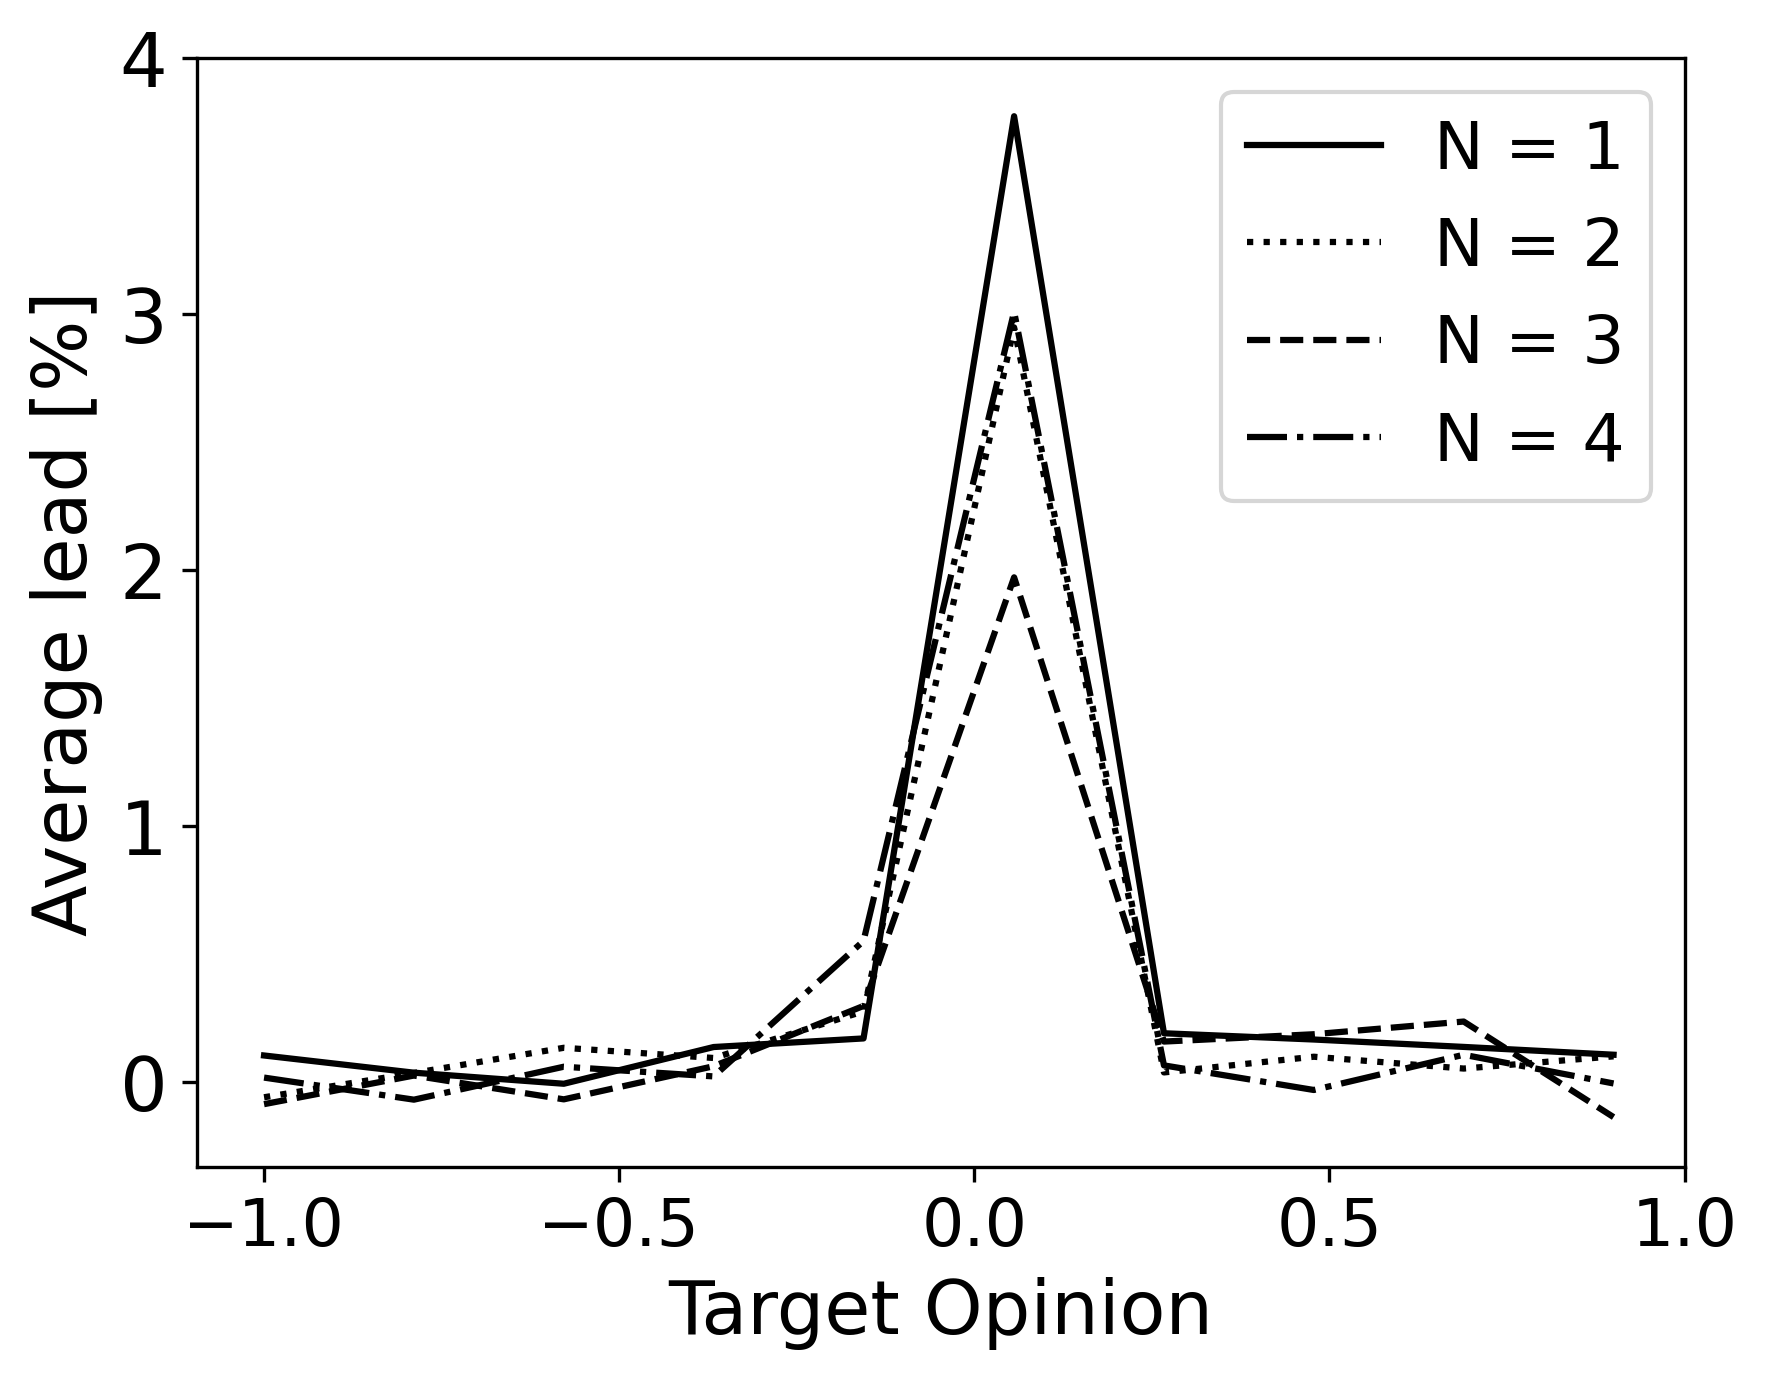

In [286]:
plt.figure(dpi=300)
plt.plot(opinion_list, heatmap[0], color = "black", label = "N = 1")
plt.plot(opinion_list, heatmap[1], color = "black", linestyle = ":", label = "N = 2")
plt.plot(opinion_list, heatmap[2], color = "black", linestyle = "--", label = "N = 3")
plt.plot(opinion_list, heatmap[3], color = "black", linestyle = "-.", label = "N = 4")
plt.ylim(top=4)
plt.xlim(right=1)
plt.ylabel("Average lead [%]")
plt.xlabel("Target Opinion")
plt.legend(loc='best')

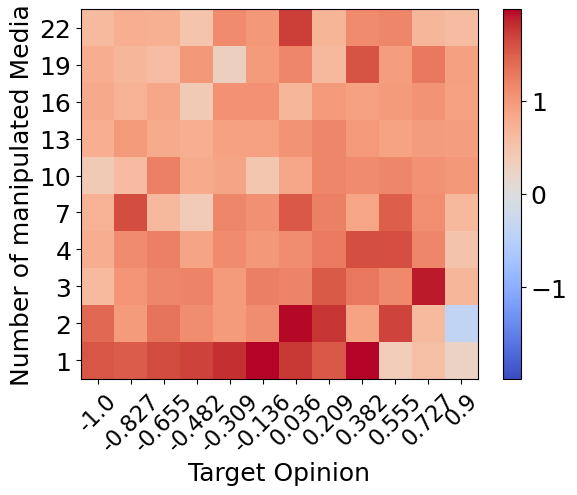

In [288]:
media_list = np.array([1,2,3,4,7,10,13,16,19,22])#np.arange(1,25,3)
opinion_list = np.linspace(-1, 0.9, num=12)
opinion_list = [round(o,3) for o in opinion_list]


heatmap = np.array(meta_analysis("Results",media_list, opinion_list, run_number=2, feedback_day=1000, test_duration=1))*100

# heatmap = heatmap[:5]

# Dynamically normalize colormap
vmin, vmax = -heatmap.max(), heatmap.max()
norm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

# Create the heatmap
plt.imshow(heatmap, aspect='auto', origin='lower', cmap='coolwarm', norm=norm)

# Add a colorbar
plt.colorbar()

# Set tick positions and labels for x-axis (opinion_list)
plt.xticks(np.arange(len(opinion_list)), opinion_list, rotation=45)

# Set tick positions and labels for y-axis (media_list)
plt.yticks(np.arange(len(media_list)), media_list)

# Set axis labels (optional)

plt.xlabel('Target Opinion')
plt.ylabel('Number of manipulated Media')

# Show the plot
plt.show()

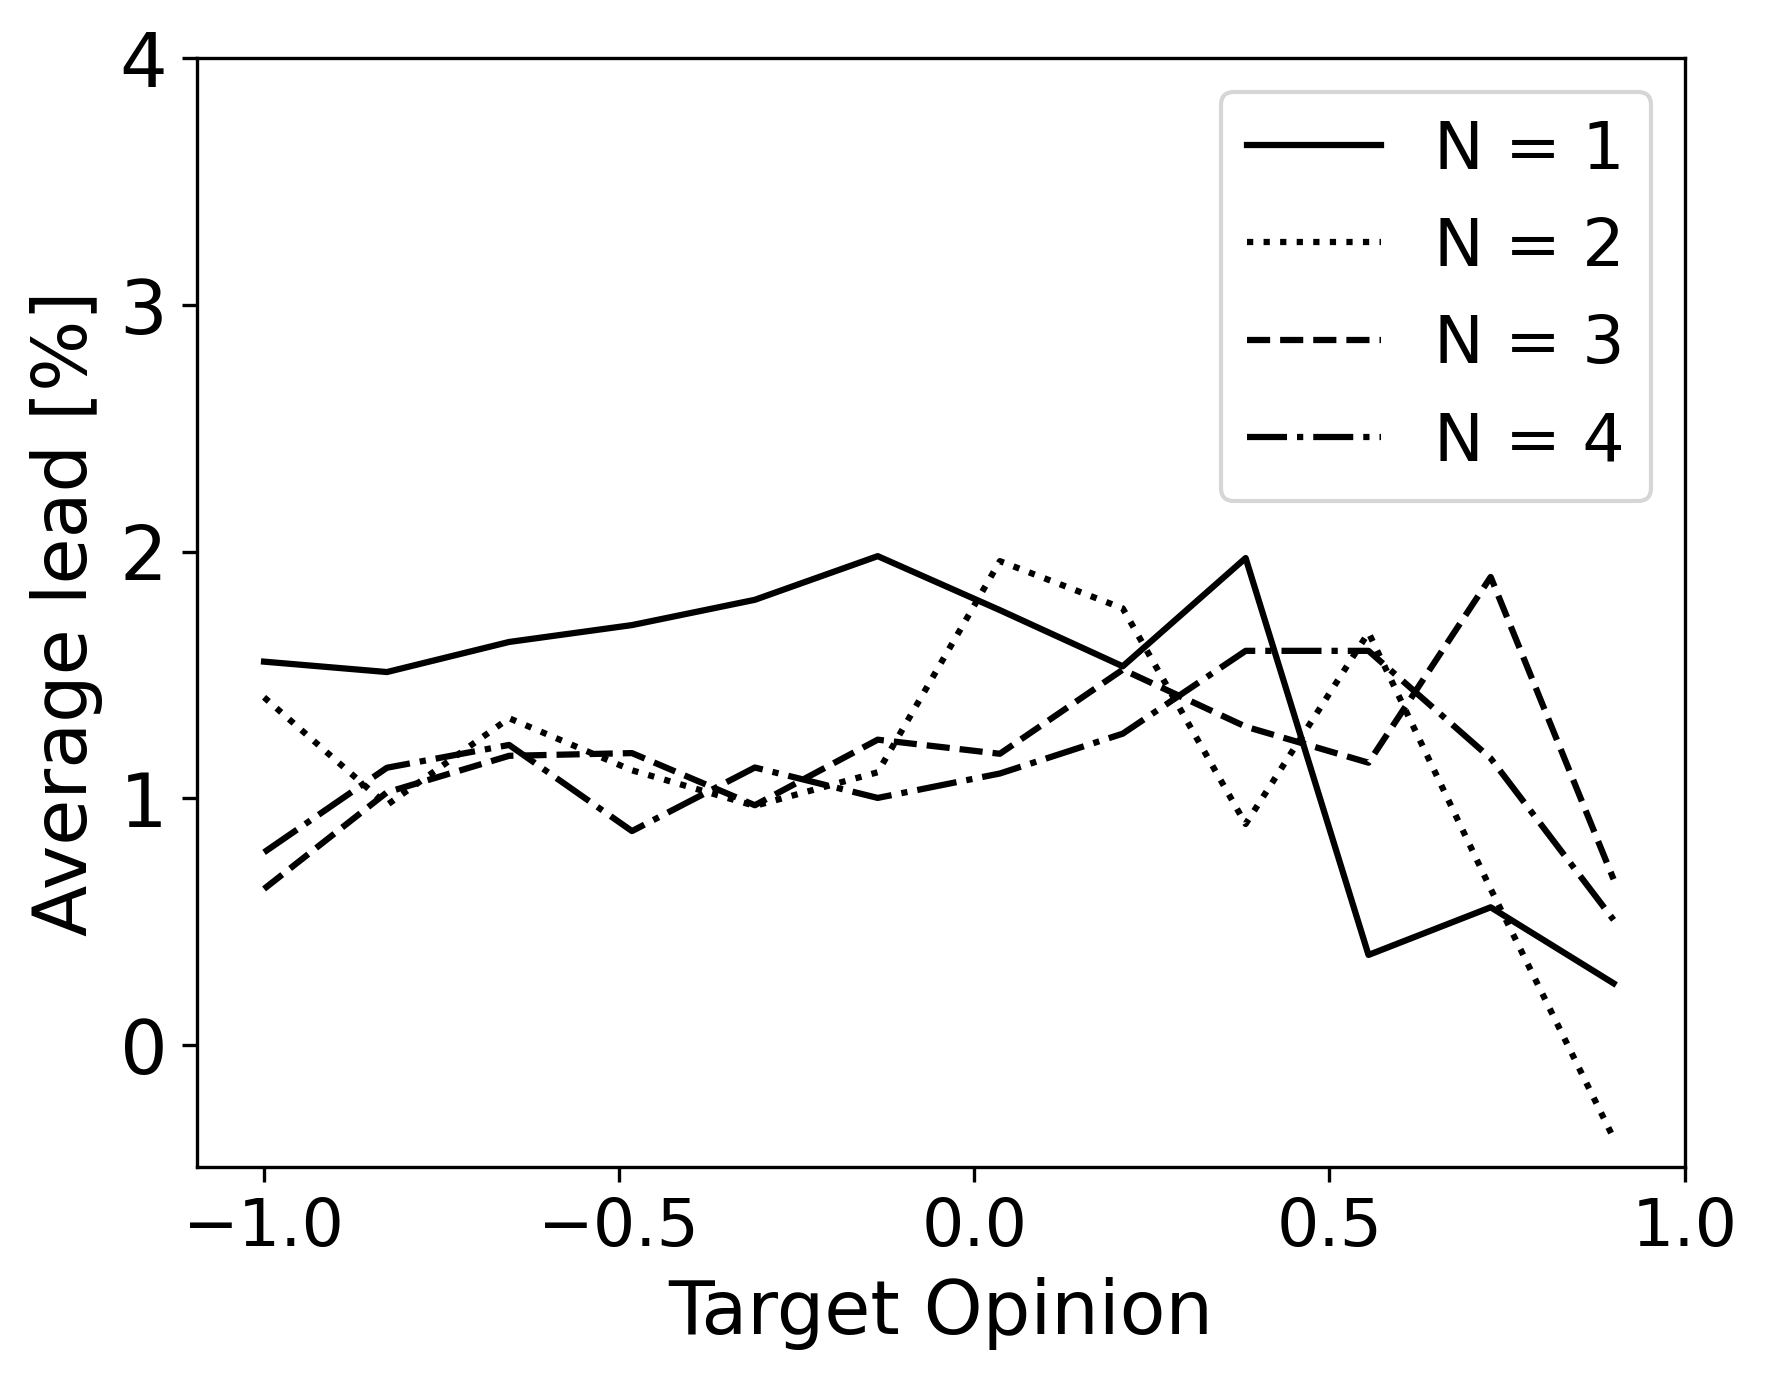

In [289]:
plt.figure(dpi=300)
plt.plot(opinion_list, heatmap[0], color = "black", label = "N = 1")
plt.plot(opinion_list, heatmap[1], color = "black", linestyle = ":", label = "N = 2")
plt.plot(opinion_list, heatmap[2], color = "black", linestyle = "--", label = "N = 3")
plt.plot(opinion_list, heatmap[3], color = "black", linestyle = "-.", label = "N = 4")
plt.ylim(top=4)
plt.xlim(right=1)
plt.ylabel("Average lead [%]")
plt.xlabel("Target Opinion")
plt.legend(loc='best')

In [24]:
# Define the file path (replace 'your_file_path.txt' with the actual path to your file)
file_path = '../Run_2_results/Run_2_n_1_o_0p9/figures_20241129/opinion_trend.txt'

# Read the file into a pandas DataFrame
# The first line of the file is used as the header (column names)
try:
    df = pd.read_csv(file_path, sep="\t", header=0)  # header=0 means use the first line as column names
    print("Dataframe successfully loaded with column names from the first line:")
    print(df)
except FileNotFoundError:
    print(f"File not found: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Dataframe successfully loaded with column names from the first line:
         -1       0       1
0    0.3308  0.3384  0.3308
1    0.3212  0.3588  0.3200
2    0.3160  0.3668  0.3172
3    0.3064  0.3848  0.3088
4    0.3008  0.3952  0.3040
..      ...     ...     ...
360  0.2976  0.4008  0.3016
361  0.2976  0.4008  0.3016
362  0.2976  0.4008  0.3016
363  0.2976  0.4008  0.3016
364  0.2976  0.4008  0.3016

[365 rows x 3 columns]


In [13]:
# Define the path to the main folder containing subfolders
main_folder_path = '../Run_2_results/Run_2_n_1_o_0p9'

# List to store DataFrames
dataframes = []

# Loop through all subfolders
try:
    for subfolder_name in os.listdir(main_folder_path):
        subfolder_path = os.path.join(main_folder_path, subfolder_name)

        # Check if it's a directory
        if os.path.isdir(subfolder_path):
            file_path = os.path.join(subfolder_path, 'opinion_trend.txt')

            # Check if the file exists in the current subfolder
            if os.path.isfile(file_path):
                # Read the file into a DataFrame
                df = pd.read_csv(file_path, sep="\t", header=0)  # header=0 assumes first line as column names
                dataframes.append(df)  # Add DataFrame to the list
                print(f"Loaded data from: {file_path}")
            else:
                print(f"No opinion_trend.txt found in: {subfolder_path}")
except Exception as e:
    print(f"An error occurred: {e}")

# Now `dataframes` contains a DataFrame for each folder's opinion_trend.txt
print(f"Loaded {len(dataframes)} DataFrames.")

Loaded data from: ../Run_2_results/Run_2_n_1_o_0p9\figures_20241129\opinion_trend.txt
Loaded data from: ../Run_2_results/Run_2_n_1_o_0p9\figures_20241129_1\opinion_trend.txt
Loaded data from: ../Run_2_results/Run_2_n_1_o_0p9\figures_20241129_2\opinion_trend.txt
Loaded data from: ../Run_2_results/Run_2_n_1_o_0p9\figures_20241129_3\opinion_trend.txt
Loaded data from: ../Run_2_results/Run_2_n_1_o_0p9\figures_20241129_4\opinion_trend.txt
Loaded data from: ../Run_2_results/Run_2_n_1_o_0p9\figures_20241129_5\opinion_trend.txt
Loaded data from: ../Run_2_results/Run_2_n_1_o_0p9\figures_20241129_6\opinion_trend.txt
Loaded data from: ../Run_2_results/Run_2_n_1_o_0p9\figures_20241129_7\opinion_trend.txt
Loaded 8 DataFrames.


In [14]:
# Ensure the list `dataframes` contains all the loaded DataFrames from the previous code
if not dataframes:
    print("No DataFrames found to combine.")
else:
    # Check that all DataFrames have the same shape
    if not all(df.shape == dataframes[0].shape for df in dataframes):
        print("Error: Not all DataFrames have the same shape.")
    else:
        # Compute the element-wise average
        # Use `.values` to extract NumPy arrays and then average them
        average_values = sum(df.values for df in dataframes) / len(dataframes)
        
        # Create a new DataFrame with the averaged values
        average_df = pd.DataFrame(average_values, columns=dataframes[0].columns)
        
        print("Average DataFrame:")
        print(average_df)

Average DataFrame:
          -1        0        1
0    0.33145  0.33725  0.33130
1    0.32225  0.35630  0.32145
2    0.31450  0.37105  0.31445
3    0.30710  0.38505  0.30785
4    0.30130  0.39585  0.30285
..       ...      ...      ...
360  0.29715  0.40475  0.29810
361  0.29720  0.40470  0.29810
362  0.29720  0.40475  0.29805
363  0.29730  0.40465  0.29805
364  0.29730  0.40470  0.29800

[365 rows x 3 columns]


In [20]:
average_df["1"]

0       0.33130
5       0.32145
10      0.31445
15      0.30785
20      0.30285
         ...   
1800    0.29810
1805    0.29810
1810    0.29805
1815    0.29805
1820    0.29800
Name: 1, Length: 365, dtype: float64

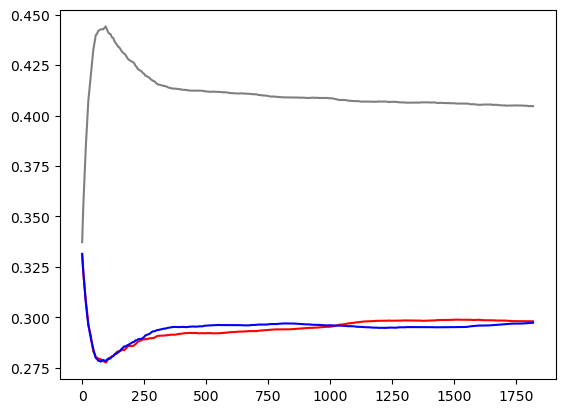